In [1]:
import pandas as pd
import numpy as np

from sklearn.metrics.pairwise import pairwise_distances

#For plotting
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
from datetime import datetime

# Import the SimpleExpSmoothing object
from statsmodels.tsa.api import SimpleExpSmoothing
# Import the ARIMA object
from statsmodels.tsa.arima.model import ARIMA

In [2]:
# Get time series data:
data = pd.read_csv('SteamCharts.csv',low_memory=False).fillna(-1)

In [29]:
# Get Perc_Gain and change data to float.
p_gain = data.loc[data['Perc_Gain']==1]
p_pure = p_gain.drop(columns=['App_id', 'Name', 'Avg_Players', 'Gain', 'Perc_Gain', 'Peak_Players',
       'Last 30 Days']).astype(float)

# Get Gain.
gain = data.loc[data['Gain']==1]
gain_pure = gain.drop(columns=['App_id', 'Name', 'Avg_Players', 'Gain', 'Perc_Gain', 'Peak_Players',
       'Last 30 Days']).astype(float)

# Get Avg_Players.
avg_players = data.loc[data['Avg_Players']==1]
avg_pure = avg_players.drop(columns=['App_id', 'Name', 'Avg_Players', 'Gain', 'Perc_Gain', 'Peak_Players',
       'Last 30 Days']).astype(float)

# Get Peak_Players.
peak_players = data.loc[data['Peak_Players']==1]
peak_pure = peak_players.drop(columns=['App_id', 'Name', 'Avg_Players', 'Gain', 'Perc_Gain', 'Peak_Players',
       'Last 30 Days']).astype(float)

# Prepare for plotting

p_gain_plot = p_gain.drop(columns=['App_id', 'Avg_Players', 'Gain', 'Perc_Gain', 'Peak_Players',
       'Last 30 Days','July 2012','August 2012'])
gain_plot= gain.drop(columns=['App_id', 'Avg_Players', 'Gain', 'Perc_Gain', 'Peak_Players',
       'Last 30 Days','July 2012'])
avg_plot = avg_players.drop(columns=['App_id', 'Avg_Players', 'Gain', 'Perc_Gain', 'Peak_Players',
       'Last 30 Days'])
peak_plot = peak_players.drop(columns=['App_id', 'Avg_Players', 'Gain', 'Perc_Gain', 'Peak_Players',
       'Last 30 Days'])

In [30]:
avg_players['max'] = avg_pure.max(axis=1)
avg_pure = avg_pure.drop(avg_players.loc[avg_players['max']==0].index)
avg_pure = avg_pure.reset_index(drop=True)

avg_players = avg_players.drop(avg_players.loc[avg_players['max']==0].index)
avg_players['mean'] = avg_pure.mean(axis=1)
avg_players = avg_players.reset_index(drop=True)

<ipython-input-30-ba8d9aaca6b3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  avg_players['max'] = avg_pure.max(axis=1)


In [43]:
avg_players

,Name,App_id,Avg_Players,Gain,Perc_Gain,Peak_Players,Last 30 Days,April 2021,March 2021,February 2021,...,February 2013,January 2013,December 2012,November 2012,October 2012,September 2012,August 2012,July 2012,max,mean
0,Counter-Strike: Global Offensive,730,1.0,0.0,0.0,0.0,694478.21,723346.52,740927.82,741013.24,...,17372.73,16164.22,14079.39,14134.1,10739.48,16000.75,15475.39,932.57,857604.22,316635.260189
1,Dota 2,570,1.0,0.0,0.0,0.0,412538.77,413784.97,390412.76,404832.13,...,166972.97,147748.14,121924.42,101077.43,75965.44,61867.68,55768.61,52721.05,709178.26,53556.196792
2,PLAYERUNKNOWN'S BATTLEGROUNDS,578080,1.0,0.0,0.0,0.0,181816.27,186110.65,193114.18,198957.52,...,-1,-1,-1,-1,-1,-1,-1,-1.00,1584886.77,31164.868679
3,Apex Legends,1172470,1.0,0.0,0.0,0.0,153386.92,124905.13,126121.06,120982.64,...,-1,-1,-1,-1,-1,-1,-1,-1.00,126121.06,2788.622170
4,Team Fortress 2,440,1.0,0.0,0.0,0.0,84791.61,88187.00,88703.56,101230.91,...,43210.75,44255.06,43623.98,42498.53,46978.7,50699.07,61561.37,45566.90,101230.91,16639.431698
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10105,Azurael's Circle: Chapter 4,1060170,1.0,0.0,0.0,0.0,0.0,-1.00,-1.00,-1.00,...,-1,-1,-1,-1,-1,-1,-1,-1.00,0.20,NaN
10106,Head Shot,485310,1.0,0.0,0.0,0.0,7.63,1.29,2.42,1.03,...,-1,-1,-1,-1,-1,-1,-1,-1.00,187.38,NaN
10107,Othello Let's Go,1256490,1.0,0.0,0.0,0.0,0.28,-1.00,-1.00,-1.00,...,-1,-1,-1,-1,-1,-1,-1,-1.00,0.75,NaN
10108,The Westport Independent,352240,1.0,0.0,0.0,0.0,0.65,1.04,-1.00,1.26,...,-1,-1,-1,-1,-1,-1,-1,-1.00,8.42,NaN


<AxesSubplot:>

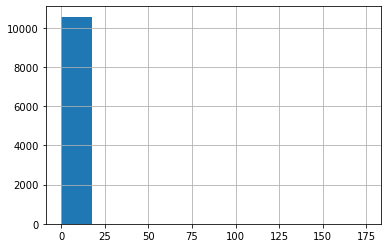

In [56]:
data_all = pd.read_csv('AllData.csv')
data_all['SteamSpyOwners(million))'] = data_all['SteamSpyOwnersNew']/(1e6)

data_all['SteamSpyOwners(million))'].hist()

<AxesSubplot:>

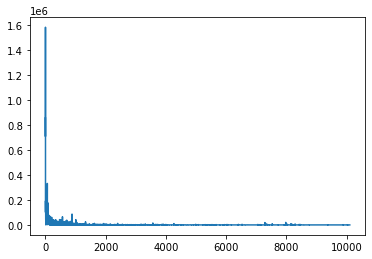

In [45]:
df = avg_players
df['max'].plot()


In [411]:
# Add columns 
birth = [avg_pure.iloc[i].last_valid_index() for i in range(len(avg_pure))]
avg_players['birth'] = birth

avg_players['today'] = datetime(2021, 5,1)
avg_players['to_today'] = ((avg_players.today - avg_players['birth'].astype('datetime64'))/np.timedelta64(1, 'M'))

peak_time = [avg_pure.iloc[i].idxmax(axis=1) for i in range(len(avg_pure))]
avg_players['peak_time'] = peak_time

avg_players['to_peak'] = (avg_players['peak_time'].astype('datetime64')- avg_players['birth'].astype('datetime64'))/np.timedelta64(1, 'M')

peak_value = [avg_players.iloc[i][peak_time[i]] for i in range(len(avg_pure))]
#avg_players['peak_value'] = peak_value
avg_players['peak_value'] = peak_value

In [412]:
avg_players

,Name,App_id,Avg_Players,Gain,Perc_Gain,Peak_Players,Last 30 Days,April 2021,March 2021,February 2021,...,August 2012,July 2012,max,mean,birth,today,to_today,peak_time,to_peak,peak_value
0,Counter-Strike: Global Offensive,730,1.0,0.0,0.0,0.0,694478.21,723346.52,740927.82,741013.24,...,15475.39,932.57,857604.22,316635.260189,July 2012,2021-05-01,105.989856,April 2020,93.012177,857604.22
1,Dota 2,570,1.0,0.0,0.0,0.0,412538.77,413784.97,390412.76,404832.13,...,55768.61,52721.05,709178.26,53556.196792,July 2012,2021-05-01,105.989856,February 2016,43.039898,709178.26
2,PLAYERUNKNOWN'S BATTLEGROUNDS,578080,1.0,0.0,0.0,0.0,181816.27,186110.65,193114.18,198957.52,...,-1,-1.00,1584886.77,31164.868679,July 2012,2021-05-01,105.989856,January 2018,66.038317,1584886.77
3,Apex Legends,1172470,1.0,0.0,0.0,0.0,153386.92,124905.13,126121.06,120982.64,...,-1,-1.00,126121.06,2788.622170,July 2012,2021-05-01,105.989856,March 2021,103.985708,126121.06
4,Team Fortress 2,440,1.0,0.0,0.0,0.0,84791.61,88187.00,88703.56,101230.91,...,61561.37,45566.90,101230.91,16639.431698,July 2012,2021-05-01,105.989856,February 2021,103.065771,101230.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10105,Azurael's Circle: Chapter 4,1060170,1.0,0.0,0.0,0.0,0.0,-1.00,-1.00,-1.00,...,-1,-1.00,0.20,NaN,July 2012,2021-05-01,105.989856,April 2019,80.987289,0.2
10106,Head Shot,485310,1.0,0.0,0.0,0.0,7.63,1.29,2.42,1.03,...,-1,-1.00,187.38,NaN,July 2012,2021-05-01,105.989856,April 2020,93.012177,187.38
10107,Othello Let's Go,1256490,1.0,0.0,0.0,0.0,0.28,-1.00,-1.00,-1.00,...,-1,-1.00,0.75,NaN,July 2012,2021-05-01,105.989856,October 2020,99.024621,0.75
10108,The Westport Independent,352240,1.0,0.0,0.0,0.0,0.65,1.04,-1.00,1.26,...,-1,-1.00,8.42,NaN,July 2012,2021-05-01,105.989856,January 2016,42.021397,8.42


In [425]:
avg_players.peak_value.astype(float)/100

0         8576.0422
1         7091.7826
2        15848.8677
3         1261.2106
4         1012.3091
            ...    
10105        0.0020
10106        1.8738
10107        0.0075
10108        0.0842
10109        0.0923
Name: peak_value, Length: 10110, dtype: float64

In [429]:
df = avg_players
df = avg_pure - 0.1* avg_players.peak_value.astype(float)
df

,0,1,2,3,4,5,6,7,8,9,...,October 2020,September 2012,September 2013,September 2014,September 2015,September 2016,September 2017,September 2018,September 2019,September 2020
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [124]:
data = avg_plot
i_game=2

game_data = data.drop(columns=['Name']).iloc[i_game]
months = pd.to_datetime(game_data.index)
game = pd.DataFrame({'Month':months,'Data': game_data.astype(float)}).sort_values(by=['Month'])

n = game.

# Use exponential smoothing to predict the last k months
train = game.iloc[n]
train

Month    2017-03-01 00:00:00
Data                17551.14
Name: March 2017, dtype: object

In [114]:
test = pd.read_csv('AllData.csv')

In [116]:
test.columns

Index(['App_id', 'Name', 'ReleaseDate', 'RequiredAge', 'DemoCount',
       'DeveloperCount', 'DLCCount', 'Metacritic', 'MovieCount',
       'PackageCount', 'RecommendationCount', 'PublisherCount',
       'ScreenshotCount', 'SteamSpyOwners', 'SteamSpyOwnersVariance',
       'SteamSpyPlayersEstimate', 'SteamSpyPlayersVariance',
       'AchievementCount', 'AchievementHighlightedCount', 'ControllerSupport',
       'IsFree', 'FreeVerAvail', 'PurchaseAvail', 'SubscriptionAvail',
       'PlatformWindows', 'PlatformLinux', 'PlatformMac', 'PCReqsHaveMin',
       'PCReqsHaveRec', 'LinuxReqsHaveMin', 'LinuxReqsHaveRec',
       'MacReqsHaveMin', 'MacReqsHaveRec', 'CategorySinglePlayer',
       'CategoryMultiplayer', 'CategoryCoop', 'CategoryMMO',
       'CategoryInAppPurchase', 'CategoryIncludeSrcSDK',
       'CategoryIncludeLevelEditor', 'CategoryVRSupport', 'GenreIsNonGame',
       'GenreIsIndie', 'GenreIsAction', 'GenreIsAdventure', 'GenreIsCasual',
       'GenreIsStrategy', 'GenreIsRPG', 'Genr

In [123]:
data.sort_values(by=['ReleaseData'])

KeyError: 'ReleaseData'

In [66]:
data.drop(columns=['Name']).iloc[i_game]
a = list(range(game.index.get_loc(game.last_valid_index())))
a

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49]

In [192]:
def plot_games(df, games,title=None, scaling=(1e6)):
    
    df_data = df.drop(columns=['Name'])#.reset_index(drop=True)
    x = pd.to_datetime(df.columns[1:])
    plt.figure(figsize=(12,12))
    for i in games:
        plt.plot(x,df_data.iloc[i].astype(float)/scaling,label=df.Name[i])
        plt.legend() 
        plt.title(str(title))
    #plt.vlines(pd.Timestamp(2020,3,1)  ,0,1,colors='k',linestyles='dashed',label='Start of Pandemic')
    #plt.text(pd.Timestamp(2020,3,1))
    plt.show()

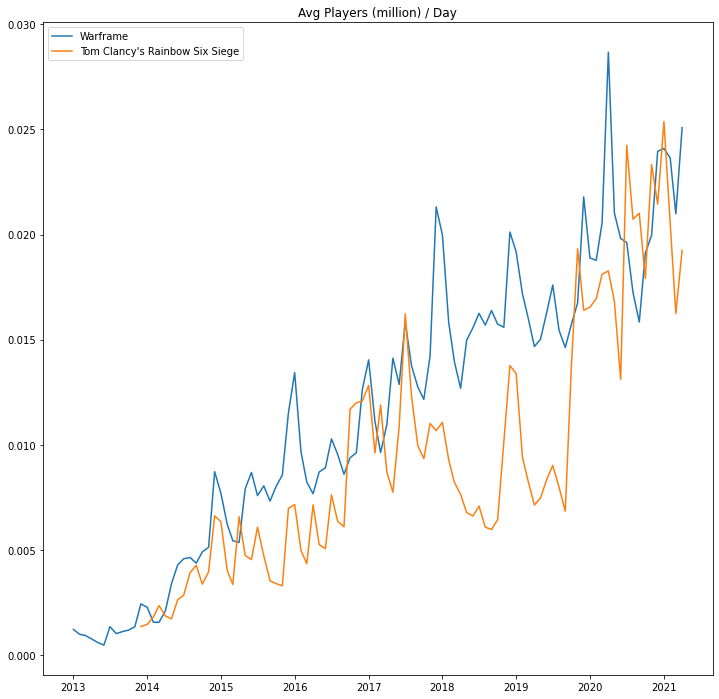

In [194]:
games = avg_players.Name[8:10].index
plot_games(avg_plot,games,title="Avg Players (million) / Day")

In [31]:
#Exponential smoothing:

def smooth_plot(data, i_game, smoothing_level=.2,label='Smoothing'):

    game_data = data.drop(columns=['Name']).iloc[i_game]
    months = pd.to_datetime(game_data.index)
    game = pd.DataFrame({'Month':months,'Data': game_data.astype(float)}).sort_values(by=['Month'])
        
    # Use exponential smoothing to predict the last k months
    train = game
    ses = SimpleExpSmoothing(train['Data'].values)
    fit = ses.fit(smoothing_level=smoothing_level, optimized=False)

    plt.figure(figsize=(8,6))
    plt.plot(game.Month,train['Data'],'b',label = "Data")
    plt.plot(game.Month,fit.fittedvalues,'r-',label = "Smoothing")
    
    plt.legend(fontsize=14)
    plt.ylabel('Number of '+label, fontsize=16)
    plt.title(str(data.Name.iloc[i_game]))
    plt.show()

C:\Users\zhoul\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


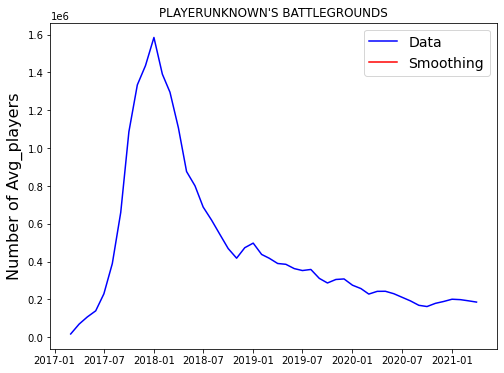

C:\Users\zhoul\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


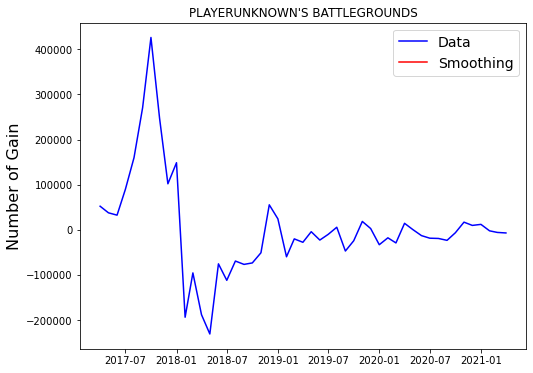

In [34]:
smooth_plot(avg_plot, 2, smoothing_level=.2,label='Avg_players')
smooth_plot(gain_plot, 2, smoothing_level=.2,label='Gain')

In [57]:
#Exponential smoothing:

def exp_plot(data, i_game,pred_k=14, smoothing_level=.2,title='Prediction'):

    game_data = data.drop(columns=['Name']).iloc[i_game]
    months = pd.to_datetime(game_data.index)
    game = pd.DataFrame({'Month':months,'Data': game_data.astype(float)}).sort_values(by=['Month'])
        
    # Use exponential smoothing to predict the last k months
    test = game[-pred_k:]
    train = game.drop(test.index)
    ses = SimpleExpSmoothing(train['Data'].values)
    fit = ses.fit(smoothing_level=smoothing_level, optimized=False)

    plt.figure(figsize=(8,6))
    plt.plot(game.Month[:len(game.Month)-pred_k],train['Data'],'b',label = "Training Data")
    plt.plot(game.Month[:len(game.Month)-pred_k],fit.fittedvalues,'r-',label = "Fitted Values")
    
    plt.plot(game.Month[-pred_k:],test['Data'],'b--',label = "Test Data")
    plt.plot(game.Month[-pred_k:],fit.forecast(len(test)),'r--',label = "Forecast")
    
    plt.legend(fontsize=14)
    plt.xlabel("Month", fontsize=16)
    plt.ylabel(title, fontsize=16)
    plt.title(str(data.Name.iloc[i_game]))
    plt.show()

C:\Users\zhoul\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


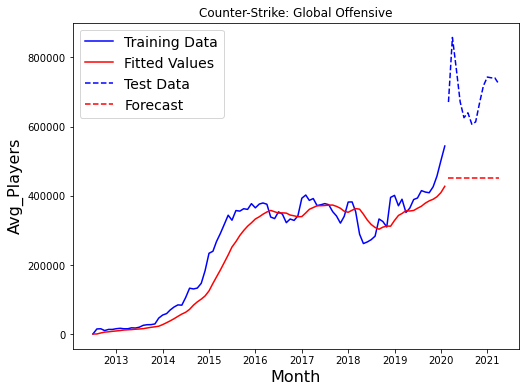

C:\Users\zhoul\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


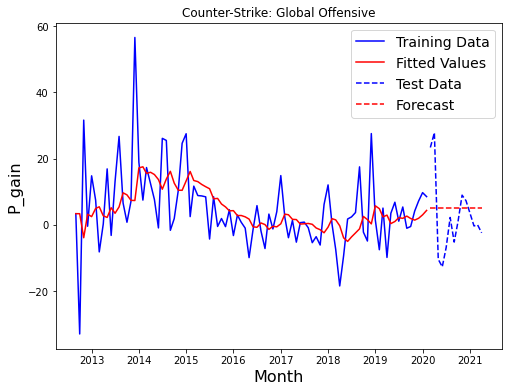

C:\Users\zhoul\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


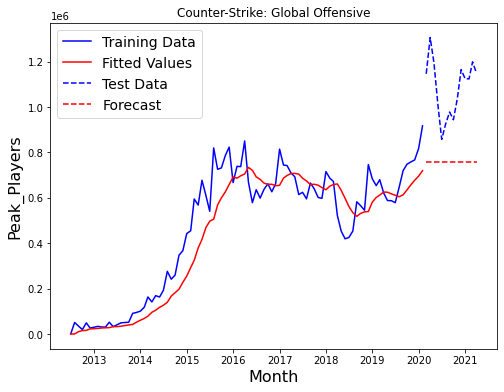

C:\Users\zhoul\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


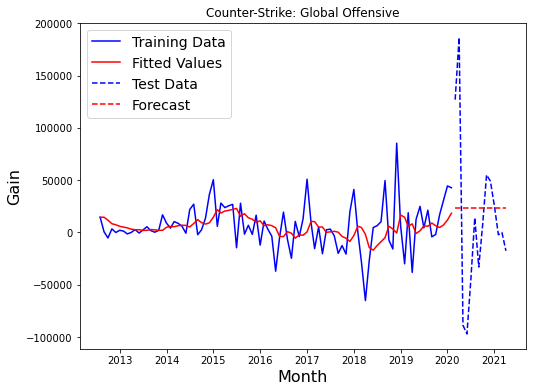

In [58]:
exp_plot(avg_plot,i_game=0,title='Avg_Players')
exp_plot(p_gain_plot,i_game=0,title='P_gain')
exp_plot(peak_plot, i_game=0,title='Peak_Players')
exp_plot(gain_plot, i_game=0,title='Gain')

In [26]:
def ARIMA_plot(data, i_game,pred_k=14, smoothing_level=.2,order=(1,0,1),scale= 1,title='ARIMA prediction'):

    game_data = data.drop(columns=['Name']).iloc[i_game]
    months = pd.to_datetime(game_data.index)
    game = pd.DataFrame({'Month':months,'Data': game_data.astype(float)}).sort_values(by=['Month'])
    game.Month[-pred_k:]
        
# Use ARIMA smoothing to predict the last k months
    test = game[-pred_k:]
    train = game.drop(test.index)
    arima = ARIMA(train['Data'], order = order)
    fit = arima.fit()

    plt.figure(figsize=(8,6))
    plt.plot(game.Month[:len(game.Month)-pred_k],train['Data'],'b',label = "Training Data")
    plt.plot(game.Month[:len(game.Month)-pred_k],fit.fittedvalues/scale,'r-',label = "Fitted Values")
    
    plt.plot(game.Month[-pred_k:],test['Data']/scale,'b--',label = "Test Data")
    plt.plot(game.Month[-pred_k:],fit.forecast(len(test))/scale,'r--',label = "Forecast")

    plt.legend(fontsize=14)
    plt.xlabel("Month", fontsize=16)
    plt.ylabel('Number of '+title, fontsize=16)
    plt.title(str(data.Name.iloc[i_game]))
    plt.show()

C:\Users\zhoul\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\zhoul\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\zhoul\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


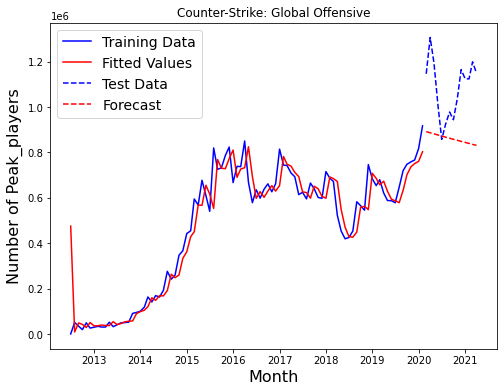

C:\Users\zhoul\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\zhoul\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\zhoul\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


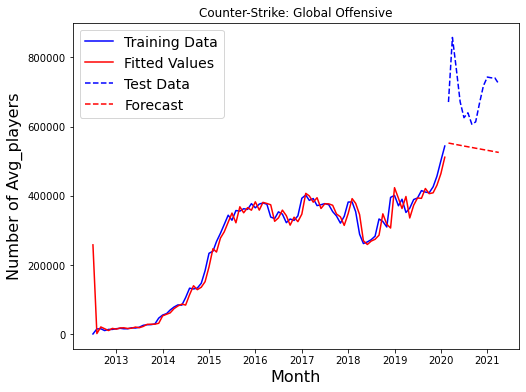

C:\Users\zhoul\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\zhoul\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\zhoul\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


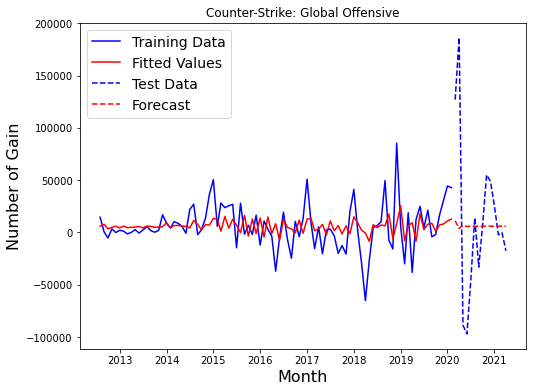

C:\Users\zhoul\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\zhoul\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\zhoul\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


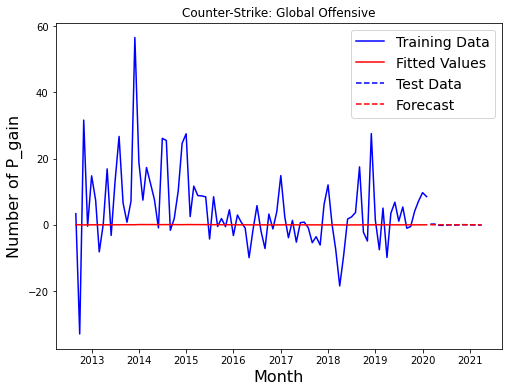

In [27]:
order = (1,0,1)
i = 0

ARIMA_plot(peak_plot, i_game=i,order=order,title='Peak_players')
ARIMA_plot(avg_plot,i_game=i,order=order,title='Avg_players')
ARIMA_plot(gain_plot,pred_k=14, i_game=i,order=order,title='Gain')
ARIMA_plot(p_gain_plot,pred_k=14, i_game=i,order=order,scale=100,title='P_gain')

In [28]:
pred_k=14

game.Month[:106-pred_k]

NameError: name 'game' is not defined

In [29]:
game.Month[-pred_k:]

NameError: name 'game' is not defined